## De Árboles de Decisión a  
## Bosques Aleatorios de Supervivencia (RSF)

Por Sebastián Mena Aliaga

## Sumario

- Arboles de Decisión
- Bosques Aleatorios
- Análisis de Supervivencia
- Bosques Aleatorios de Supervivencia (RSF)
- Bibliografía

## Árboles de decisión

Es un modelo de predicción basado en decisiones. Son intuitivos y sus decisiones son fáciles de interpretar (Modelo de caja blanca).

Pueden ser utilizados para tareas de clasificación y regresión.

<img src="img/iris_tree.png" width="350">


## Impureza del nodo

La impureza de un nodo nos aporta información acerca de la probabilidad de no obtener la clase predicha por un nodo.

### Índice de Gini

$ G_i = 1 \sum_{i=1}^{n} {p_{i,k}^2} $

Un nodo $i$-esimo es puro si $G_i = 0$.

### Entropía

$ H_i = \sum_{k=1}^2{p_{i,k} log_2(p_{i,k})} $

Un nodo $i$-esimo es puro si $H_i = 0$.

$p_{i,k}$ es el ratio de instancias de clase $k$ entre las instancias de entrenamientos del nido $i$-esimo.

## Entrenamiento del modelo: Algoritmo CART

Se comienza diviendo el conjunto de entrenamiento en dos subconjuntos, mediante una característica $k$ y un umbral $t_k$.

Ej. característcia ($k$:) longitud del pétalo iris; umbral ($t_k$): $\leq$ 2.45 cm.

### ¿Cómo se elige $k$ y $t_k$? 

Se selecciona ($k$, $t_k$) que produzca los nodos más puros (ponderados por tamaño), siguiendo la función de perdida:

$ J(k,t_k) = \frac{m_{izq}}{m} G_{izq} + \frac{m_{dcha}}{m} G_{dcha}$

$G_{izq/dcha}$ mide la impureza del subconjunto (nodo) izquierdo/derecha.

$m_{izq/dcha}$ cantidad de instancias del subconjunto izquierda/derecha.

Una vez el algoritmo divide el conjunto en dos subconjuntos, divide dichos subconjuntos siguiendo la misma lógica, después los subconjuntos sy así sucesivamente.

Este proceso se repite hasta reducir completamente la impureza de los nodos o alcanzando la profundida máxima permitida.

## Complejidad Computacional

Encontrar un árbol óptimo pertenece a los problemas NP-Completo. 

Teoría de la complejidad: ¿Cómo crece el coste computacional (memoria y tiempo) en resolver un determinado problema en relación a lo que crece en tamaño de dicho problema?

Medir de como aumenta el coste computacional de solucionar un problema respecto al tamaño del problema.

NP : Conjunto de problemas en los que podemos comprobar en un tiempo razonable (polinomial) si una respuesta al problema es correcta o no.

P : Conjunto de problemas en los que podemos encontrar una respuesta al problema en un tiempo razonable.

Entrenar el modelo, resultado de comparar todas las características de todas las muestras de entrenamiento de cada nodo, requiere un tiempo $O(n \cdot m \cdot log_2(m))$.

m: número de atributos; n: número de instancias.

Realizar una predicción, recorrer el árbols desde el nodo raíz hasta el nodo terminal, requiere un tiempo aproximado de $O(log_2(m))$.

## Supuestos e hiperparámetros

Los árboles de decisión asumen muy pocos supuesos sobre la distribución de los datos, se denominan a menudo "modelos no paramétricos".

Para evitar el sobreajuste del modelo, se pueden utilizar hipterparámetros de regularización, si bien depende del algoritmo de entrenamiento utilizado, por lo general al menos se puede restringir la profundidadi máxima del árbol.

Una implementación básica en Sckit-Learn:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    max_depth=2 # Profundidad máxima del árbol
)
clf.fit(X, y)

## Ensamblaje y Random Forest

La idea básica detrás de los ensambladores es contar con diferentes modelos predictivos entrenados a partir de subconjuntos de un mismo conjunto de datos. 

Los métodos más populares de ensamblaje son _bagging_, _boosting_ y _stacking_.

<img src="https://miro.medium.com/max/4800/1*WLfYK7UUFgJEbNGMAwcRaQ.png" width="550" />

## Claificadores por votación

Consiste en entrenar varios modelos (Regresión Logística, SVM, Árboles, etc.) a partir de un mismo conjunto de entrenamiento.

Para una nueva instancia, cada modelo genera una predicción. La predicción final del ensamblador será la predicción más votada de cada uno de los modelos.

<img src="https://i.stack.imgur.com/W7UmY.png" width="500" />

### Ej. implementación de Voting en Sckit-Learn

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
# Generamos datos dummy
X, y = make_moons(n_samples=1000, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Se crean las instancias de los modelos
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [ ]:
from sklearn.ensemble import VotingClassifier
# Se crea la instancia de un ensamblador por votación
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard')
# Se ajusta el modelo 
voting_clf.fit(X_train, y_train)

### Rendimiento de los modelos:

In [ ]:
from sklearn.metrics import accuracy_score
# Rendimiento de cada uno de los modelos
for clf in (log_clf, rnd_clf, svm_clf, voting_clf) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8433333333333334
RandomForestClassifier 0.9633333333333334
SVC 0.9666666666666667
VotingClassifier 0.9666666666666667


## Bagging y Pasting

Este enfoque crea un ensamblador de varios predictores a partir de un mismo algoritmo, y los entrena en diferentes subconjuntos aleatorios de un mismo conjunto de entrenamiento por cada predictor.

El método __bagging__ muestrea subconjuntos con remplazo y __pasting__ lo hace sin remplazo.

<img src="https://miro.medium.com/max/1400/1*iskng0M2Qv9GF0CADcl0Ww.png" width="600" />

Tal como se observa en la imagen, un ensamble con _bagging_ de 500 árboles es capaz de generalizar mucho mejor que un solo árbol. Posee un mayor sesgo pero es compensado con una menor varianza.

<img src="https://static.wixstatic.com/media/dcb8fd_0af0229fa2bb499d96a4efd2248c3c9c~mv2.png/v1/fill/w_1000,h_360,al_c,usm_0.66_1.00_0.01/dcb8fd_0af0229fa2bb499d96a4efd2248c3c9c~mv2.png" width="700" />

## Random Forest

El algoritmo fue originalmente propuesto por Tim Kam Ho en 1995, y se propuso una extensión muy popular por Breiman en 2001.

El _Random Forest_ es un ensamble de árboles de decisión, entrenados, por lo general, mediante método _bagging_.

Esta implementación se especializa de la implementación de _Bagging Classifier_, debido a que introduce una aleatoriedad extra cuando se hacen crecer los árboles.

En vez de buscar la mejor característica cuando divide un nodo, busca la mejor característica de un subconjunto de características. Esto permite más diversidad de árboles, compensando un sesgo más alto por una varianza más baja.

Implementación de Bagging Classifier en Sklearn:

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter = 'random', max_leaf_nodes = 16),
    n_estimators = 500, max_samples = 1.0, bootstrap = True
)

Implementación de Random Forest  en Sklearn:

In [ ]:
rnd_clf = RandomForestClassifier(
    n_estimators=500, max_leaf_nodes=16
)

### Extremely Randomized Trees

Al crear un árbol en _Random Forest_, en cada nodo solo se considera un subconjunto aleatorio de características ($k$) para la división. 

Es posible hacer que los árboles sean aún más aleatorios al utilizar umbrales ($t_k$) aleatorios para cada característica ($k$), en vez de buscar los mejores umbrales posibles.

De esta forma se compensa aún más el sesgo con una varianza más baja

### Importancia de la características

Una cualidad importante de los _Random Forest_ es que hacen posible medir la importancia de las características a través de cuanto reducen la impureza.

$ J(k,t_k) = \frac{m_{izq}}{m} G_{izq} + \frac{m_{dcha}}{m} G_{dcha}$

 Se escalan los resultados de manera que la suma de todas las importancias de cada característica sea 1.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators= 500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [ ]:
for name, score in zip(iris["feature_names"], 
                       rnd_clf.feature_importances_) :
    print(name, score)

sepal length (cm) 0.10854219464982803
sepal width (cm) 0.02450463322990364
petal length (cm) 0.44220301839228204
petal width (cm) 0.4247501537279862


## Análisis de Supervivencia

El análisis de supervivencia es un subcampo de la estadística, cuyo  objetivo es analizar y modelar datos de un sujeto en estudio, donde el resultado es el tiempo hasta que ocurre un evento de interés y su probabilidad asociada.

### Tiempo de supervivencia

Sea $T_i$ una variable aleatoria no negativa que denota el tiempo hasta la ocurrencia de un evento de interés para una instancia $i$-esima.

Para una instancia data $i$, representada por el vector $(X_i, y_i, \delta_i)$, donde $ X_i \in \Re^{1 \times P} $ es el vector de características. 

$P$: número características.

$\delta_i$: indicador binario de ocurrencia del evento ($\delta_i = 0$, instancia con censura a la derecha). 

$y_i$: tiempo observado de la instancia. Si se observa el evento se denota $T_i$, si hay censura se denota $C_i$.

$$
y_i =
\begin{cases}
T_i & \quad \text{si $ \delta_i = 1 $}\\ 
C_i & \quad \text{si $ \delta_i = 0 $}
\end{cases}
$$

### Censura

Existen eventos "censurados", del cual no se sabe el tiempo de ocurrencia del evento. 

Existen tres tipos de censuras:

- __Censura a la derecha__, donde el evento no logra ocurrir hasta el tiempo de medición del dato; 
- __Censura a la izquierda__, donde el sujeto existe antes de la medición del dato; 
- __Intervalo censurado__, donde el evento sabemos que ocurre en un intervalo.

Métodos estadístico y Machine Learning se han adaptado para trabajar con data censurada.

<img src="https://bigdata.go.th/wp-content/uploads/2020/09/Screenshot-2020-10-06-093522.png" width="650" />

[[fuente](https://opus1993.github.io/myTidyTuesday/Survival.html)] Survival Analysis, Jim Gruman.

## Función de supervivencia

La función se utiliza para representar la probabilidad de que el tiempo hasta el evento de interés no sea anterior a un tiempo específico $t$.

Siendo este uno de los principales objetivos en el análisis de supervivencia.

$S(t) = Pr(T \geq t)$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Survival_function_1.svg/1920px-Survival_function_1.svg.png" width="650" />

## Metricas de desempeño

Debido a la presencia de censura en los datos de supervivencia, las métricas de evaluación estándar para la regresión, como R2, no son adecuadas para medir el rendimiento en el análisis de supervivencia. Por ello se deben utilizar medidas especializadas:

- __Indice C__: Conocido como indice de concordancia, dicha metrica considera el riesgo relativo de que ocurra un evento para diferentes instancias.

- __Metrica Brier__: Desarrollada para predecir inicialmente la inexactitud del pronóstico meteorologico. Su resultado se encuentra en un rango entre 0 y 1.

## Taxonomía

En términos generales, los métodos de análisis de supervivencia se pueden clasificar en dos categorías principales: métodos estadísticos y métodos basados en Machine Learning.

Los métodos de Machine Learning generalmente se aplican a los problemas de alta dimensión.

Los métodos estadísticos permiten hacen inferencias a partir de los resultados y comparar diferencias entre grupos.

<img src="https://humboldt-wi.github.io/blog/img/seminar/group2_SurvivalAnalysis/overall1.jpg" width="650" />

<img src="https://humboldt-wi.github.io/blog/img/seminar/group2_SurvivalAnalysis/overall2.jpg" width="650" />

### Estimador Nelson-Aalen y Función de Supervivencia

Anteriormente, definimos la función de supervivencia como: $S(t) = Pr(T \geq t)$.

La relación entre la CHF $H(t)$ y la Función de Supervivencia $S(t)$ viene dada por: 

$$S(t) = exp[-H(t)]$$

### Predicción temprana

Un buen modelo de supervivencia debe tener la capacidad de pronosticar la ocurrencia del evento en el futuro utilizando solo información en su etapa inicial.

El enfoque de una Predicción en Etapa Temprana es tener la capacidad de pronosticar ocurrencia de eventos nuevos basado en información temprana.

## Random Survival Forest (RSF)

El algoritmo fue propuesto por Hemant Ishwaran et al., en 2008.

La metodología de _Random Survival Forest_ (RSF) amplía el método de _Random Forest_ (RF) propuesto por Breiman (2001).

RSF son arboles de decisión capaces de trabajar con datos censurados a la derecha, y obtiene su predicción a partir del total de muertes esperadas dado un tiempo $t$, derivada de la __Función de Riesgo Acumulativo__ (_cumulative hazard function_, CHF).

### Algoritmo RSF

1. Se realizan N bootstraping de la data de entrenamiento.

2. Se hace crecer un árbol por cada subconjunto (Mediante CART). Por cada nodo de cada árbol se selecciona aleatoriamente una característica $k$. El nodo se divide utilizando el umbral $k$ que máximice la diferencia de supervivencia entre nodos hijos.

3. Cada árbol crece a tamaño completo con la restricción de que un nodo terminal no debe tener menos de una muerte.

4. Se calcula un CHF para cada árbol y se promedio para obtener el ensamble CHF.

5. Usando datos OOB, se calcule el error de predicción para el ensamble CHF.

### Nodo Terminal

El árbol de supervivencia alcanza un punto de saturación (nodo terminal) debido al criterio que cada nodo debe contener un mínimo de una "muerte" ($d_0 > 0$).

Se denota $(T_{1,h}, \delta_{1,h}), ...,(T_{i,h}, \delta_{i,h})$, siendo $T$ tiempo de supervivencia, la variable binaria $\delta$ como la censura a la derecha, para cada individuo $i$ y nodo terminal $h$.

Se define $d_{l,h}$ e $Y_{l,h}$ como el número de muertes e individuos en riesgo en el momento $t_{l,h}$.

La estimación de CHF para $h$ es el estimador de Nelson-Aalen

$$
\hat{H}_h(t) =
\sum_{t_{l,h} \leq t} \frac{d_{l,h}}{Y_{l,h}}
$$

Todos los individuos $i$ dentro del nodo terminal $h$ tienen el mismo CHF.

Cada individuo $i$ tiene una covariable $d$-dimensional denotada $X_i$.

Se define $H(t|X_i)$ como CHF del individuo $i$-esimo.

Dada la naturaleza binaria de un árbol de supervivencia, un individuo $i$ con características $X_i$ caerá a un único nodo terminal $h$.

El CHF para $i$ es el estimador Nelson-Aalen para $X_i$ del nodo terminal:

$H(t|X_i) = \hat{H}_h(t)$

El CHF anteriormente descrito es para un árbol, para obtener el CHF del ensamble se deben promediar los CHF de todos los árboles.

## Implementación con Sckit-Survival

Se utilizan los datos del Grupo de Estudio Alemán de Cáncer de Mama (GBSG-2) sobre el tratamiento de pacientes con cáncer de mama ganglionar positivo. 

Contiene datos sobre 686 mujeres y 8 factores pronósticos: 1. edad, 2. receptor de estrógeno (_estrec_), 3. si se administró o no una terapia hormonal (_horTh_), 4. estado menopáusico (_menostat_), 5. número de ganglios (_pnodes_), 6. receptor de progesterona (_progrec_), 7. tamaño del tumor (_tsize_), 8. grado tumoral (_tgrade_).

El objetivo es predecir el tiempo de supervivencia

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

set_config(display="text")  # displays text representation of estimators

In [ ]:
X, y = load_gbsg2()

# Convierte el dominio de valores I, II y III de la variable "tgrade" a 0, 1 y 2 respectivamente
grade_str = X.loc[:, "tgrade"].astype(object).values[:, np.newaxis]
grade_num = OrdinalEncoder(categories=[["I", "II", "III"]]).fit_transform(grade_str)
X_no_grade = X.drop("tgrade", axis=1)
# Dummyfica las variables catecoricas: "horTh" y "menostat"
Xt = OneHotEncoder().fit_transform(X_no_grade)
Xt.loc[:, "tgrade"] = grade_num

In [ ]:
random_state = 20
# Train y test split
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.25, random_state=random_state)

In [ ]:
X_train.head()

,age,estrec,horTh=yes,menostat=Post,pnodes,progrec,tsize,tgrade
292,64.0,71.0,1.0,1.0,1.0,340.0,15.0,1.0
46,65.0,6.0,0.0,1.0,1.0,6.0,20.0,1.0
447,52.0,5.0,0.0,1.0,1.0,8.0,35.0,2.0
547,60.0,8.0,1.0,1.0,7.0,14.0,15.0,0.0
20,56.0,23.0,0.0,1.0,1.0,28.0,22.0,1.0


In [ ]:
y_train[:5]

array([(False, 2009.), (False, 2233.), ( True,  308.), (False,  429.),
       ( True, 1684.)], dtype=[('cens', '?'), ('time', '<f8')])

### Training

In [ ]:
rsf = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           n_jobs=-1,
                           random_state=random_state)
rsf.fit(X_train, y_train)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=1000, n_jobs=-1, random_state=20)

La metrica de desempeño es el Indice de Concordancia.

In [ ]:
rsf.score(X_test, y_test)

0.6759696016771488

### Predicción

In [ ]:
# Se ordena de menor a mayor las variables: "pnodes", "age"
X_test_sorted = X_test.sort_values(by=["pnodes", "age"])
# Se obtienen los 3 primeros y 3 últimos registros de este ordenamiento
X_test_sel = pd.concat((X_test_sorted.head(3), X_test_sorted.tail(3)))

X_test_sel

,age,estrec,horTh=yes,menostat=Post,pnodes,progrec,tsize,tgrade
119,33.0,0.0,0.0,0.0,1.0,26.0,35.0,2.0
574,34.0,37.0,0.0,0.0,1.0,0.0,40.0,2.0
421,36.0,14.0,0.0,0.0,1.0,76.0,36.0,1.0
24,65.0,64.0,0.0,1.0,26.0,2.0,70.0,2.0
8,80.0,59.0,0.0,1.0,30.0,0.0,39.0,1.0
226,72.0,1091.0,1.0,1.0,36.0,2.0,34.0,2.0


#### Puntuación de riesgo

La puntuación de riesgo del conjunto es el número total de eventos, que se puede estimar mediante la suma de la Función de Religro Acumulativo (CHF) del conjunto estimado $\hat{H}_e$.

$$ \sum_{j=1}^{n} \hat{H}_e (T_j | x) $$

Dónde $n$ denota el número total de tiempos de eventos distintos.

In [ ]:
pd.Series(rsf.predict(X_test_sel))

0     91.477609
1    102.897552
2     75.883786
3    170.502092
4    171.210066
5    148.691835
dtype: float64

Las puntuaciones de riesgo previstas indican que el riesgo para los últimos tres pacientes es bastante más alto que el de los tres primeros pacientes.

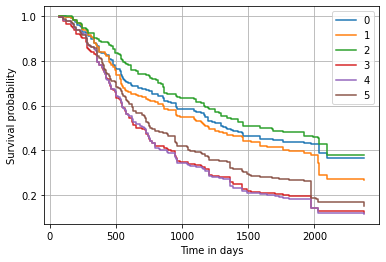

In [ ]:
surv = rsf.predict_survival_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

A partir de la función de supervivencia, es posible obtener una visualización, de esta se puede observar que la mayor diferencia ocurre aproximadamente dentro de los primeros 750 días.

Alternativamente, también podemos trazar la Función de Riesgo Acumulativo (CHF) predicho.

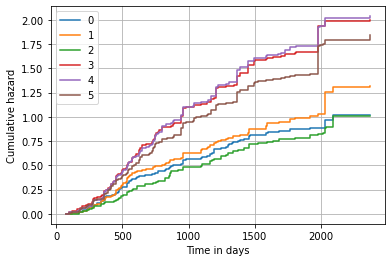

In [ ]:
surv = rsf.predict_cumulative_hazard_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

### Importancia de las características

La implementación se basa en la implementación Random Forest de scikit-learn y hereda muchas características.

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(
    rsf, X_test, y_test, n_repeats=15, random_state=random_state)
pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=X_test.columns
).sort_values(by="importances_mean", ascending=False).head()

,importances_mean,importances_std
pnodes,0.076616,0.019106
age,0.016562,0.008774
progrec,0.011513,0.013504
horTh=yes,0.008220,0.004313
tgrade,0.004831,0.003773


El resultado muestra que el número de ganglios (pnodes) es, por mucho, la característica más importante.

## Bibliografía

Ishwaran, H., Kogalur, U. B., Blackstone, E. H., &#38; Lauer, M. S. (2008). Random Survival Forests. , 2(3), 841–860. 

Ra, Karthikeyan. (2015). A Comparison study of Kaplan-Meier and Nelson-Aalen Methods in Survival Analysis. 2. 34-38.

Wang, P., Li, Y., Reddy, C. K. (2019). Machine Learning for Survival Analysis. _ACM Computing Surveys (CSUR)_, 51.

Aurélien Géron. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems. _O’Reilly Media_, 851.

User Guide — Scikit-Survival 0.18.0. (n.d.). Retrieved September 19, 2022, from https://scikit-survival.readthedocs.io/en/stable/user_guide/index.html